In [4]:
#DATS 6103 – Individual Project 2 – Nelson Foster
# Ecological Footprint of Countries (EFC) and 
#Environmental Vulnerability Index(EVI), 2004
#loading libraries
import requests
import plotly.plotly as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string as str
import statistics as stat
import plotly.figure_factory as ff
import plotly.graph_objs as go
%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14



In [6]:
#loading the file and checking values

EVI = pd.read_excel('EVI_04.xls')
EFC = pd.read_excel('EFC_04.xls')
EVI.head()
EFC.head()
EVI.head().values
EFC.head().values
list(EVI)

['Country Code',
 'ISO2',
 'FIPS_10',
 'UNSD',
 'Country_Standard',
 'Country_EVI',
 'EVI',
 'HAZARDS',
 'RESISTANCE',
 'DAMAGE',
 'CCEVI',
 'ENDEVI',
 'HHEVI',
 'AFEVI',
 'WATEVI',
 'CCDEVI',
 'CBDEVI',
 'WINDEVI',
 'DRYEVI',
 'WETEVI',
 'HOTEVI',
 'COLDEVI',
 'SSTEVI',
 'VOLCANOEVI',
 'EARTHQKEVI',
 'TSUNAMIEVI',
 'SLIDESEVI',
 'LANDEVI',
 'DISPEVI',
 'ISOLEVI',
 'RELIEFEVI',
 'LOWEVI',
 'BORDEVI',
 'IMBALEVI',
 'OPENEVI',
 'MIGEVI',
 'ENDEMEVI',
 'INTROEVI',
 'ENDANGEVI',
 'EXTINCTEVI',
 'VEGEVI',
 'VEGLOEVI',
 'FRAGEVI',
 'DEGEVI',
 'RESRVEVI',
 'MPAEVI',
 'FARMEVI',
 'FERTLEVI',
 'PESTCDEVI',
 'BIOTECHEVI',
 'PRDOFEVI',
 'FSHEFEVI',
 'WATEREVI',
 'SULPHEVI',
 'WASTEEVI',
 'TRTMNTEVI',
 'INDUSTEVI',
 'SPILLSEVI',
 'MININGEVI',
 'SANEVI',
 'VEHEVI',
 'POPDNEVI',
 'POPGRTHEVI',
 'TOUREVI',
 'CSTPOPEVI',
 'AGRMTEVI',
 'CONFLTEVI',
 'WIND',
 'DRY',
 'WET',
 'HOT',
 'COLD',
 'SST',
 'VOLCANO',
 'EARTHQK',
 'TSUNAMI',
 'SLIDES',
 'LAND',
 'DISP',
 'ISOL',
 'RELIEF',
 'LOW',
 'BORD',
 'IM

In [7]:
#looking at the data types
EVI.dtypes
EFC.dtypes

Country Name           object
Short Name             object
year                    int64
Record                 object
Built-up Land         float64
Carbon                float64
Cropland              float64
Fishing Grounds       float64
Forest Products       float64
Grazing Land          float64
Total                 float64
Data Quality Score     object
isoa2                  object
dtype: object

In [8]:

#converting NaNs to zeros

EVI.fillna(0, inplace=True)
EFC.fillna(0, inplace=True)

In [10]:
#Exploratory Data Analysis (EDA): Environmental Vunerability Index (EVI)

list(EVI)
#Identifying the nations ranked as extremely vulnerable 

EVI_subset = EVI[EVI.EVI >= 365]

EVI_subset

#Overall Extremely Vulnerable Nations 

EVI_summary = EVI_subset.groupby(['Country Code'])['EVI'].mean()

EVI_summary

Country Code
ASM    446.154
AUT    369.048
BEL    387.234
BMU    373.077
BRB    402.857
COK    382.927
FSM    391.892
GBR    372.917
GLP    412.000
GUM    390.323
IND    384.783
ISR    380.000
ITA    385.714
JAM    380.851
JPN    389.362
KIR    385.366
KOR    372.917
LBN    387.234
LCA    393.103
MAC    407.407
MDV    382.759
MLT    367.647
MNP    378.261
NFK    368.182
NLD    387.755
NRU    421.053
PAK    373.333
PHL    402.128
PYF    380.645
SGP    428.261
TON    400.000
VGB    381.818
VIR    395.652
Name: EVI, dtype: float64

In [11]:
#Analyses of Key Aggregate Variables: Climate Change Sub-Index, 
#Biodiversity Sub-Index, & Conflict Subindex

Aggregates = EVI_subset.groupby(['Country Code'])['CCEVI', 'CBDEVI', 
                               'CONFLTEVI',].mean()
Aggregates

#Analyses of Overall Population Density versus Costal Population Density


PopDensity = EVI_subset.groupby(['Country Code'])['CSTPOP', 'POPDN'].mean()

PopDensity

,CSTPOP,POPDN
Country Code,,
ASM,0.0,308.543
AUT,0.0,99.251
BEL,1110.0,336.123
BMU,0.0,1079.980
BRB,0.0,640.302
COK,80.0,74.167
FSM,150.0,160.399
GBR,240.0,243.502
GLP,0.0,252.737


In [12]:
#Comparison of key EVI subindexes: Hazards, Prior Damage, Sea Temperatures
#Population Density, & Coastal Population Density

KeyEVI = EVI_subset.groupby(['Country Code'])['HAZARDS', 'DAMAGE', 'SSTEVI',
                           'POPDNEVI', 'CSTPOPEVI'].mean()

KeyEVI

,HAZARDS,DAMAGE,SSTEVI,POPDNEVI,CSTPOPEVI
Country Code,,,,,
ASM,3.308,6.143,3.0,7.0,0.0
AUT,3.962,3.667,0.0,5.0,0.0
BEL,3.931,4.727,6.0,7.0,7.0
BMU,2.923,4.714,4.0,7.0,0.0
BRB,3.200,5.750,1.0,7.0,0.0
COK,3.074,4.857,2.0,4.0,4.0
FSM,3.136,5.000,2.0,6.0,6.0
GBR,3.833,4.182,4.0,6.0,6.0
GLP,3.417,5.429,2.0,7.0,0.0


In [13]:
#Now, onto analyzing the Ecological Footpriont of Countries (Per Capita)

#Looking at summary statistics to determine how to best subset the EFC data

EFC.describe()

,year,Built-up Land,Carbon,Cropland,Fishing Grounds,Forest Products,Grazing Land,Total
count,195.0,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2004.0,0.054573,1.397627,0.537271,0.115904,0.358672,0.216032,3.155954
std,0.0,0.051141,1.848418,0.455174,0.259234,0.403086,0.250402,2.443652
min,2004.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.493431
25%,2004.0,0.023116,0.077295,0.261141,0.009237,0.118318,0.035552,1.337054
50%,2004.0,0.043222,0.629141,0.421178,0.045259,0.273417,0.144538,2.317191
75%,2004.0,0.071488,2.235826,0.782228,0.114799,0.457690,0.295883,4.507158
max,2004.0,0.240486,13.106916,2.496373,3.002247,2.877218,1.567126,15.677856


In [14]:
#subsetting based on estimated median to identify natiosn with the largest
#ecological footprint

EFC_subset = EFC[EFC.Total >= 7]


EFC_subset

EFC_summary = EFC_subset.groupby(['Country Name']) ['Total'].mean()

EFC_summary

Country Name
Australia                    10.116249
Australia and New Zealand     9.410728
Belgium                       7.532457
Canada                        9.276513
Czech Republic                7.266521
Denmark                       8.170773
Estonia                       9.111093
Finland                       7.106401
Luxembourg                   15.677856
North America                10.558681
Oceania                       7.744075
Singapore                     7.572001
United States of America     10.699176
Name: Total, dtype: float64

In [15]:
#analysis of key EFC Variables

KeyEFC = EFC_subset.groupby(['Country Name']) ['Built-up Land', 'Carbon',
                           'Cropland', 'Fishing Grounds', 'Forest Products', 
                           'Grazing Land'].mean()

KeyEFC


,Built-up Land,Carbon,Cropland,Fishing Grounds,Forest Products,Grazing Land
Country Name,,,,,,
Australia,0.115728,5.361859,2.496373,0.146986,1.203011,0.792292
Australia and New Zealand,0.116742,4.902294,2.155991,0.293326,1.228007,0.714368
Belgium,0.240486,4.967345,1.004497,0.115144,0.597377,0.607607
Canada,0.059541,5.604153,1.736464,0.211607,1.377096,0.287653
Czech Republic,0.149956,4.831287,1.115468,0.036875,0.816970,0.315964
Denmark,0.220401,4.012283,1.407048,0.845231,1.214849,0.470963
Estonia,0.087198,4.985464,1.369403,0.081429,2.443062,0.144538
Finland,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Luxembourg,0.179261,13.106916,1.289838,0.110087,0.348611,0.643144


In [16]:
#Analysis of Carbon Footprint Per Capita Variable 

CarbonEFC = EFC.groupby(['Country Name']) ['Carbon'].mean()
CarbonEFC

Country Name
Afghanistan                          0.044867
Africa                               0.363368
Albania                              0.935327
Algeria                              0.869077
Angola                               0.129344
Argentina                            1.025107
Armenia                              0.569670
Asia                                 0.968520
Australia                            5.361859
Australia and New Zealand            4.902294
Austria                              4.308242
Azerbaijan                           1.315322
Bangladesh                           0.140467
Barbados                             2.769120
Belarus                              2.224459
Belgium                              4.967345
Benin                                0.215917
Bermuda                              0.000000
Bhutan                               0.180271
Bolivia                              0.360839
Bosnia and Herzegovina               1.443047
Botswana             

In [17]:
#top per capita carbon footprint 

CarbonEFC_sort =  CarbonEFC.nlargest(20)
CarbonEFC_sort

Country Name
Luxembourg                   13.106916
United States of America      7.508797
North America                 7.320538
Singapore                     6.102899
Canada                        5.604153
Australia                     5.361859
Estonia                       4.985464
Belgium                       4.967345
Australia and New Zealand     4.902294
Czech Republic                4.831287
Netherlands                   4.400272
Austria                       4.308242
Korea, Republic of            4.159147
United Kingdom                4.020779
Switzerland                   4.012692
Denmark                       4.012283
Israel                        3.993764
Greece                        3.886418
Oceania                       3.803360
Japan                         3.769650
Name: Carbon, dtype: float64

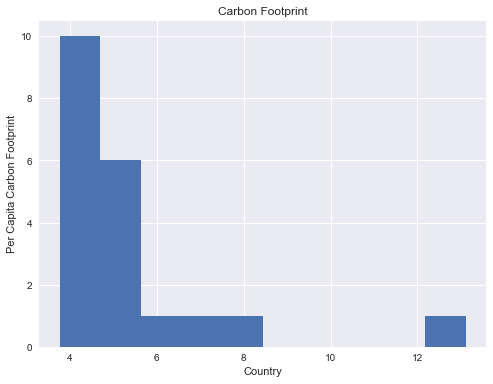

In [18]:
#histogram of carbon Footprint
CarbonEFC_sort.plot(kind='hist', bins=10, title='Carbon Footprint')
plt.xlabel('Country')
plt.ylabel('Per Capita Carbon Footprint')

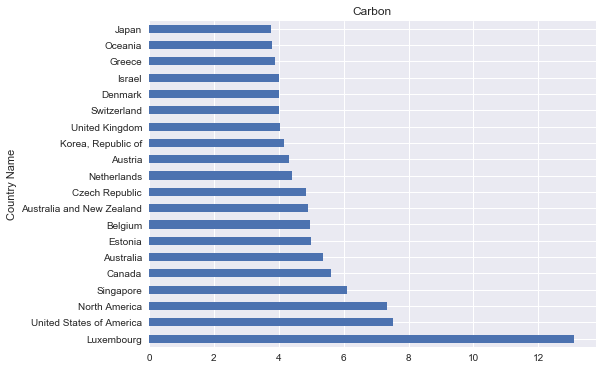

In [19]:
#series plot of Carbon Footprint per Capita

pd.Series(CarbonEFC_sort).plot(kind='barh', title='Carbon')

In [20]:
#And now, for some plots, using preselected styles


plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

/Users/nfoster06/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



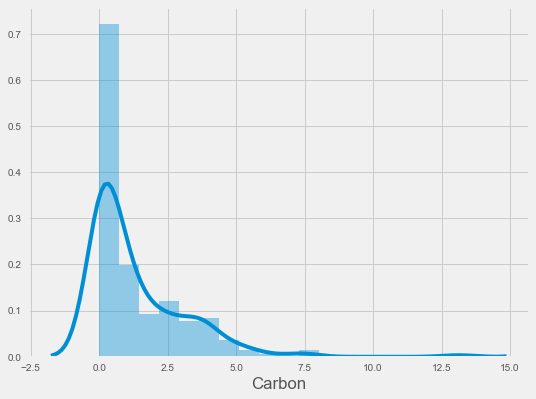

In [24]:
#distribution of Carbon Footprint Only


sns.distplot(CarbonEFC)



/Users/nfoster06/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



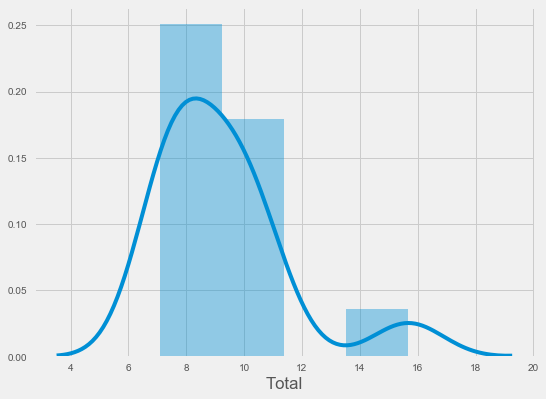

In [25]:
#Distribution of Ecological Footprint of Countries

sns.distplot(EFC_summary)

/Users/nfoster06/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



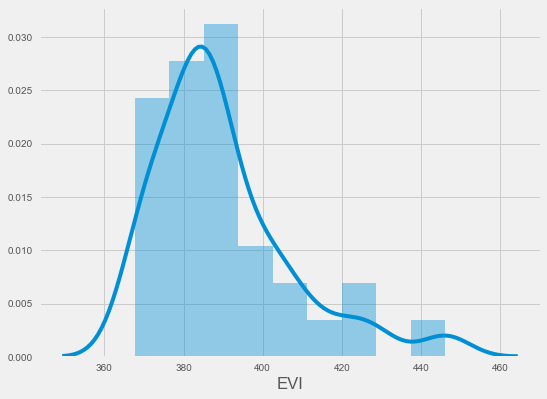

In [26]:
#distrinbution of Enviornmental Vulnerability Index among Most Vulnerable Nations

sns.distplot(EVI_summary)

In [28]:
#Aggregate Sub indexes

CCsub = EVI_subset.groupby(['Country Code'])['CCEVI'].mean()
CCsub.sort_values(ascending=True)

CBsub = EVI_subset.groupby(['Country Code'])['CBDEVI'].mean()
CBsub.sort_values(ascending=True)

Conflict = EVI_subset.groupby(['Country Code'])['CONFLTEVI'].mean()
Conflict.sort_values(ascending=True)

Country Code
PYF    0.0
GUM    0.0
ASM    1.0
TON    1.0
SGP    1.0
NRU    1.0
NLD    1.0
NFK    1.0
MNP    1.0
MLT    1.0
MDV    1.0
MAC    1.0
LCA    1.0
VGB    1.0
KIR    1.0
KOR    1.0
JAM    1.0
AUT    1.0
BEL    1.0
BMU    1.0
BRB    1.0
JPN    1.0
FSM    1.0
COK    1.0
GLP    1.0
ITA    1.0
GBR    1.0
VIR    1.0
LBN    6.0
IND    7.0
PAK    7.0
PHL    7.0
ISR    7.0
Name: CONFLTEVI, dtype: float64

/Users/nfoster06/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



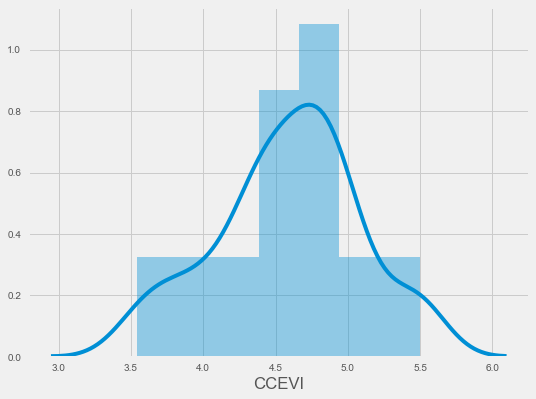

In [29]:
sns.distplot(CCsub)

/Users/nfoster06/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



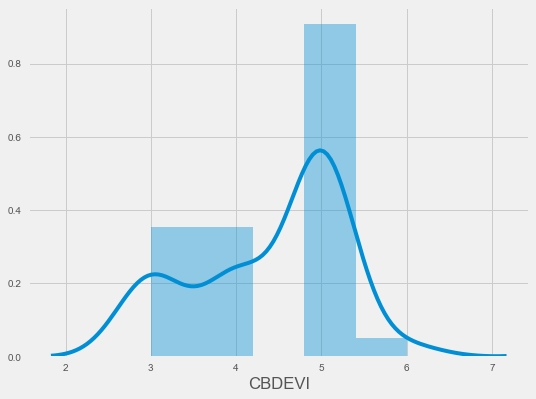

In [30]:
sns.distplot(CBsub)

/Users/nfoster06/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



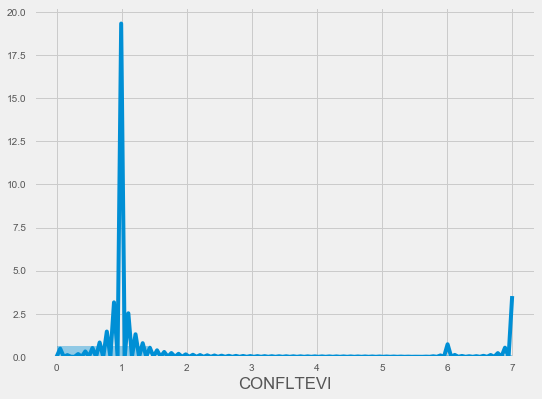

In [31]:
sns.distplot(Conflict)

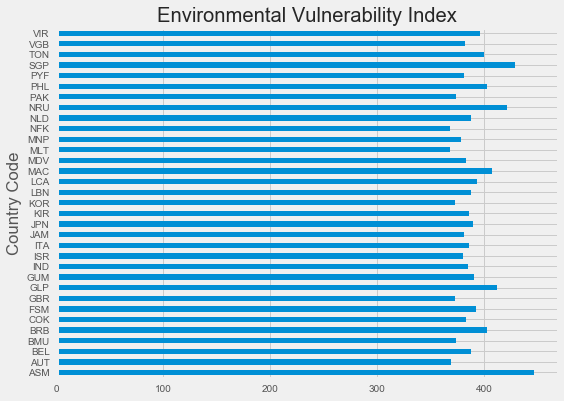

In [32]:
#barcharts for EVI

pd.Series(EVI_summary).plot(kind='barh', title='Environmental Vulnerability Index')

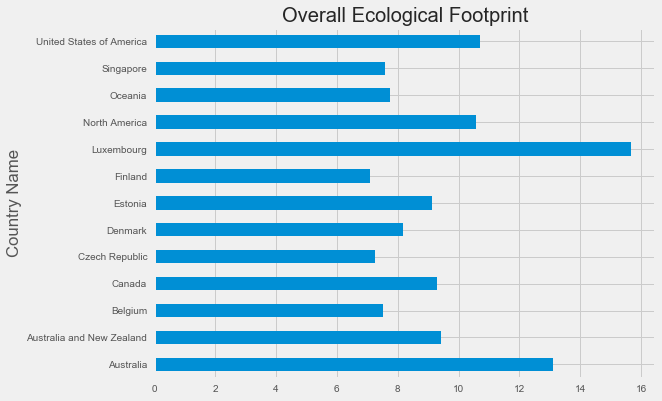

In [33]:
#barcharts for EFC
pd.Series(CarbonEFC_sort).plot(kind='barh', title='Carbon')
pd.Series(EFC_summary).plot(kind='barh', title='Overall Ecological Footprint')

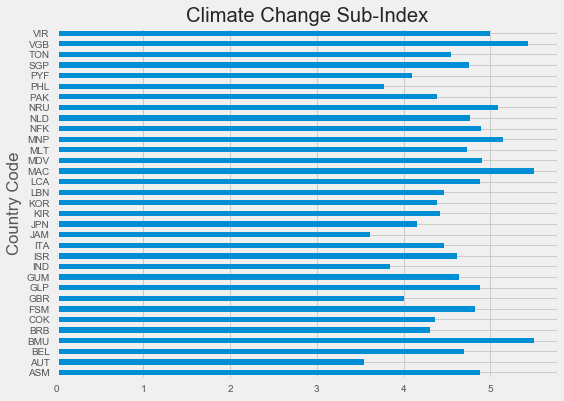

In [34]:
#Climate Change Sub-Index Series Chart

pd.Series(CCsub).plot(kind='barh', title='Climate Change Sub-Index')

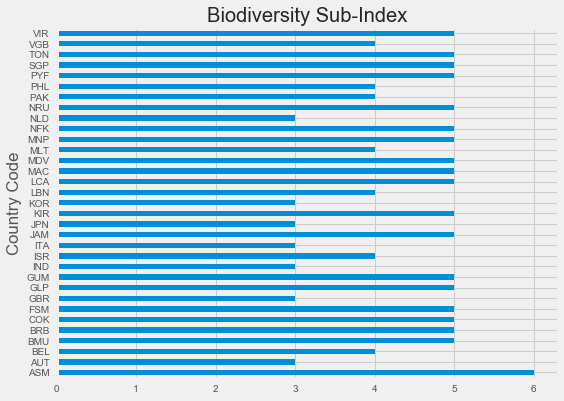

In [35]:
#Overall Biodiversity Sub-Index Series Chart

pd.Series(CBsub).plot(kind='barh', title='Biodiversity Sub-Index')

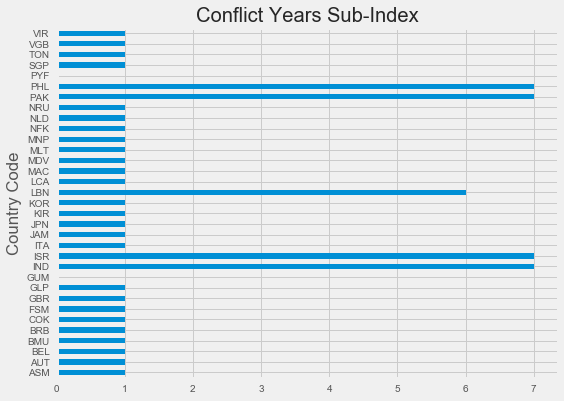

In [38]:
#Overall Biodiversity Sub-Index Series Chart


pd.Series(Conflict).plot(kind='barh', title='Conflict Years Sub-Index')